# 사전작업

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Flatten,Dense, Dropout,MaxPooling2D
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
# 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
import os

# relu+adam+dropout+batch normalization, batch size=96, Epoch 조정

In [ ]:
checkpoint_path = 'C:/Users/user/Desktop/cpkt/cp--{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0,
                                                 save_freq='epoch',
                                                 )  

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same",name="C1"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5),name="C3"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5),name="C5"), 
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    Flatten(name="Flatten"), 
    Dense(84, activation='relu',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'],
                    )
base_hist = model_lenet5.fit(train_images, train_labels, epochs=100,
                             validation_split=0.2,batch_size=96, callbacks=[cp_callback])

Epoch 1/100
500/500 [==============================] - 6s 10ms/step - loss: 0.2133 - accuracy: 0.9375 - val_loss: 0.0648 - val_accuracy: 0.9808
Epoch 2/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0792 - accuracy: 0.9745 - val_loss: 0.0483 - val_accuracy: 0.9852
Epoch 3/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0638 - accuracy: 0.9804 - val_loss: 0.0397 - val_accuracy: 0.9873
Epoch 4/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0536 - accuracy: 0.9828 - val_loss: 0.0348 - val_accuracy: 0.9898
Epoch 5/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0478 - accuracy: 0.9843 - val_loss: 0.0315 - val_accuracy: 0.9903
Epoch 6/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.0327 - val_accuracy: 0.9903
Epoch 7/100
500/500 [==============================] - 4s 7ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0395 - val_accuracy: 0.988

Epoch 58/100
500/500 [==============================] - 5s 9ms/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 0.0339 - val_accuracy: 0.9923
Epoch 59/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0113 - accuracy: 0.9959 - val_loss: 0.0317 - val_accuracy: 0.9927
Epoch 60/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0297 - val_accuracy: 0.9933
Epoch 61/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0319 - val_accuracy: 0.9927
Epoch 62/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0309 - val_accuracy: 0.9935
Epoch 63/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0324 - val_accuracy: 0.9926
Epoch 64/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.0300 - val_accuracy:

In [ ]:
history_dict=base_hist.history

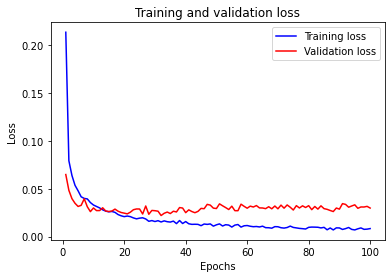

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')

plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

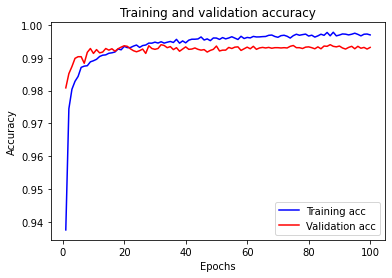

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
for i in range(100):
    if i<9:
        model_lenet5.load_weights('C:/Users/user/Desktop/cpkt/cp--000'+str(i+1)+'.ckpt')
    elif:
        model_lenet5.load_weights('C:/Users/user/Desktop/cpkt/cp--00'+str(i+1)+'.ckpt')
    else:
        model_lenet5.load_weights('C:/Users/user/Desktop/cpkt/cp--0'+str(i+1)+'.ckpt')
    test_loss_temp, test_acc_temp = model_lenet5.evaluate(test_images,  test_labels, verbose=2)
    
    test_loss+=[test_loss_temp] 
    test_acc += [test_acc_temp]

313/313 - 1s - loss: 0.0627 - accuracy: 0.9789 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0378 - accuracy: 0.9869 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0307 - accuracy: 0.9897 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0263 - accuracy: 0.9912 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0270 - accuracy: 0.9912 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0251 - accuracy: 0.9910 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0373 - accuracy: 0.9873 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0236 - accuracy: 0.9908 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0212 - accuracy: 0.9929 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0209 - accuracy: 0.9935 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0218 - accuracy: 0.9932 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0238 - accuracy: 0.9911 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0232 - accuracy: 0.9925 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0246 - accuracy: 0.9921 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0209 - accu

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for C:/Users/user/Desktop/cpkt/cp--00100.ckpt

In [ ]:
    model_lenet5.load_weights('C:/Users/user/Desktop/cpkt/cp--0100.ckpt')
    test_loss_temp, test_acc_temp = model_lenet5.evaluate(test_images,  test_labels, verbose=2)
    
    test_loss+=[test_loss_temp] 
    test_acc += [test_acc_temp]

313/313 - 1s - loss: 0.0191 - accuracy: 0.9943 - 1s/epoch - 4ms/step


In [ ]:
for i in range(100):

        
    lossmin=round(min(test_loss),4)
    
    if (lossmin==round(test_loss[i],4)):
        print("loss")
        print(i+1)
        
    accmax=round(max(test_acc),4)
        
    if (accmax==round(test_acc[i],4)):
        print("acc")
        print(i+1)

acc
57
loss
67


IndexError: list index out of range

In [ ]:
for i in [32,57,67]:

    model_lenet5.load_weights('C:/Users/user/Desktop/cpkt/cp--00'+str(i)+'.ckpt')
   
    test_loss_temp, test_acc_temp = model_lenet5.evaluate(test_images,  test_labels, verbose=2)
    


313/313 - 1s - loss: 0.0209 - accuracy: 0.9933 - 1s/epoch - 3ms/step
313/313 - 1s - loss: 0.0198 - accuracy: 0.9948 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0180 - accuracy: 0.9940 - 1s/epoch - 4ms/step


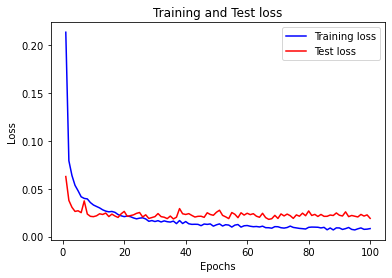

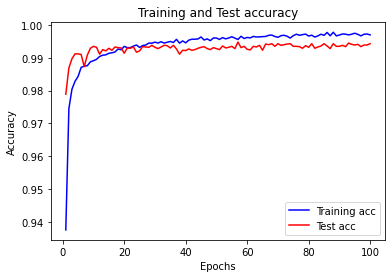

In [ ]:
acc = history_dict['accuracy']
loss = history_dict['loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')

plt.plot(epochs, test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, test_acc, 'r', label='Test acc')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

 * Epoch 100회까지 시행 시 67회에서 최적의 가중치를 가진다



# 번외- 앙상블모델

* 번외로 최적의 test loss를 갖는 Epoch 57회의 가중치와 최적의 test accuracy를 갖는 Epoch 67회의 가중치 모델을 평균내서 적용하는 앙상블 모델을 구현하였다.
* 마지막 출력층에 대한 Epoch=30 정도의 훈련으로도 개선된 결과를 얻을 수 있었다.


In [ ]:
model_lenet5_57=Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same",trainable=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, trainable=False), 
    Conv2D(16, (5, 5),trainable=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2,trainable=False), 
    Conv2D(120, (5, 5),trainable=False), 
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    Flatten(), 
    Dense(84, activation='relu',trainable=False), 
    Dense(10, activation='softmax',trainable=False)
],name="LeNet-5_57")



In [ ]:
model_lenet5_67=Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same",trainable=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, trainable=False), 
    Conv2D(16, (5, 5),trainable=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2,trainable=False), 
    Conv2D(120, (5, 5),trainable=False), 
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    Flatten(), 
    Dense(84, activation='relu',trainable=False), 
    Dense(10, activation='softmax',trainable=False)
],name="LeNet-5_67")



In [ ]:
model_lenet5_57.load_weights('C:/Users/user/Desktop/cpkt/cp--0057.ckpt')
model_lenet5_67.load_weights('C:/Users/user/Desktop/cpkt/cp--0067.ckpt')

In [ ]:
x1=model_lenet5_57.output
x2=model_lenet5_67.output

In [ ]:
net=layers.Average()([x1,x2])

In [ ]:
output=Dense(10, activation='softmax')(net)

In [ ]:
model_ensemble=models.Model([model_lenet5_57.input,model_lenet5_67.input],net)

In [ ]:
model_ensemble.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_ensemble.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_21_input (InputLayer)   [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_24_input (InputLayer)   [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_21 (Conv2D)             (None, 28, 28, 6)    156         ['conv2d_21_input[0][0]']        
                                                                                                  
 conv2d_24 (Conv2D)             (None, 28, 28, 6)    156         ['conv2d_24_input[0][0]']        
                                                                                            

 dense_18 (Dense)               (None, 10)           850         ['dense_17[0][0]']               
                                                                                                  
 average_5 (Average)            (None, 10)           0           ['dense_16[0][0]',               
                                                                  'dense_18[0][0]']               
                                                                                                  
Total params: 124,548
Trainable params: 568
Non-trainable params: 123,980
__________________________________________________________________________________________________


In [ ]:
model_ensemble.fit([train_images,train_images], train_labels, epochs=30,validation_split=0.2,batch_size=96)

Epoch 1/30
500/500 [==============================] - 6s 12ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0262 - val_accuracy: 0.9939
Epoch 2/30
500/500 [==============================] - 5s 11ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0264 - val_accuracy: 0.9942
Epoch 3/30
500/500 [==============================] - 5s 11ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0262 - val_accuracy: 0.9939
Epoch 4/30
500/500 [==============================] - 5s 11ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0269 - val_accuracy: 0.9940
Epoch 5/30
500/500 [==============================] - 5s 10ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0265 - val_accuracy: 0.9940
Epoch 6/30
500/500 [==============================] - 5s 11ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0264 - val_accuracy: 0.9941
Epoch 7/30
500/500 [==============================] - 5s 10ms/step - loss: 0.0051 - accuracy: 0.9990 - val_loss: 0.0265 - val_accuracy: 0.9939

In [ ]:
test_loss, test_acc = model_ensemble.evaluate([test_images,test_images],  test_labels, verbose=2)

313/313 - 2s - loss: 0.0176 - accuracy: 0.9951 - 2s/epoch - 5ms/step
